Реализуйте или найдите реализации двух сортировок: сортировка выбором и быстрая
сортировка. Проведите вычислительные эксперименты и нарисуйте графики,
показывающие зависимость времени выполнения двух алгоритмов от размера входных
данных. Рассмотрите три варианта входных данных:
1. Список случайных чисел
2. Отсортированный список
3. Отсортированный в обратную сторону список  
Для каждого из вариантов должен быть свой график зависимости.

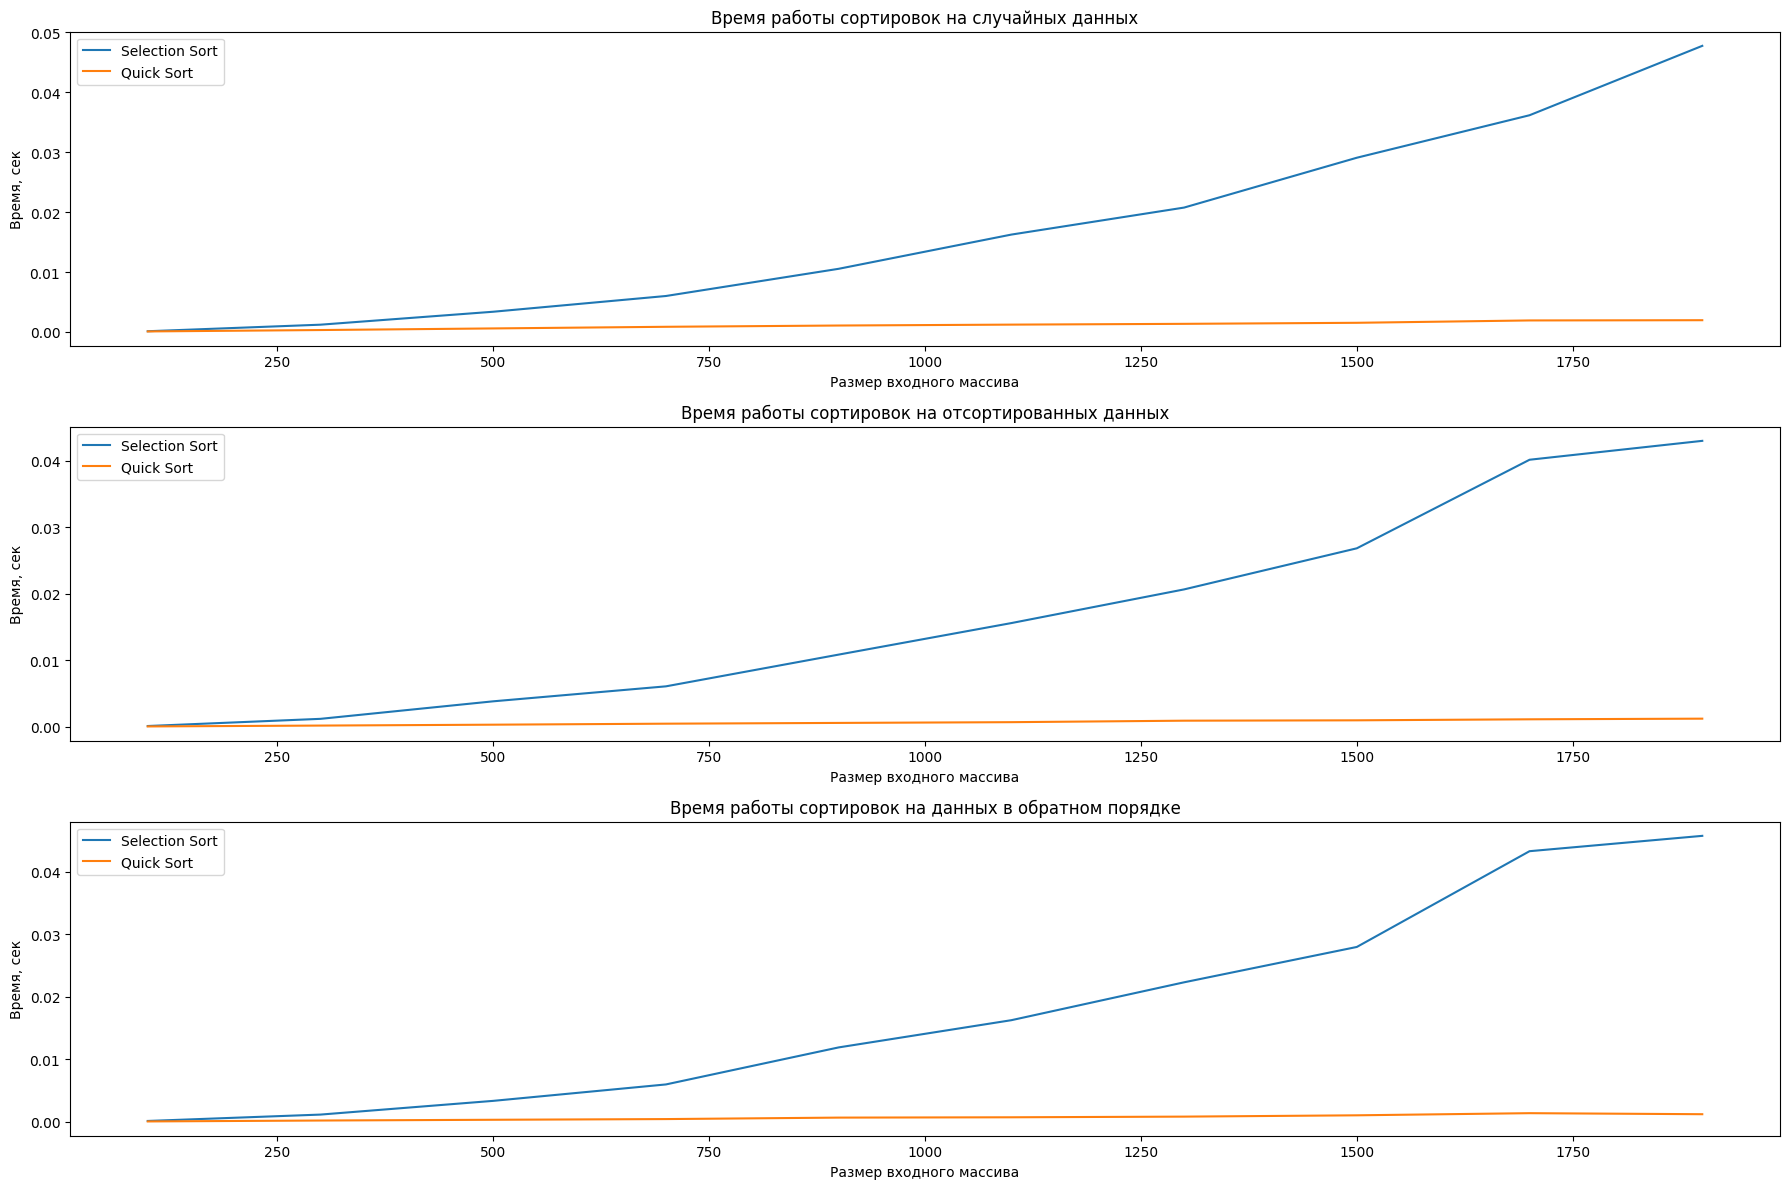

In [ ]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]


def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)


def measure_time(sort_func, data):
    start_time = time.time()
    if sort_func == quick_sort:
        sort_func(data)
    else:
        sort_func(data)
    return time.time() - start_time


sizes = list(range(100, 2100, 200))

random_times_selection = []
random_times_quick = []
sorted_times_selection = []
sorted_times_quick = []
reverse_times_selection = []
reverse_times_quick = []

for size in sizes:
    arr_random = random.sample(range(size * 10), size)
    arr_sorted = list(range(size))
    arr_reverse = list(range(size, 0, -1))

    arr_copy_random = arr_random.copy()
    arr_copy_sorted = arr_sorted.copy()
    arr_copy_reverse = arr_reverse.copy()

    random_times_selection.append(measure_time(selection_sort, arr_copy_random.copy()))
    random_times_quick.append(measure_time(quick_sort, arr_copy_random.copy()))

    sorted_times_selection.append(measure_time(selection_sort, arr_copy_sorted.copy()))
    sorted_times_quick.append(measure_time(quick_sort, arr_copy_sorted.copy()))

    reverse_times_selection.append(measure_time(selection_sort, arr_copy_reverse.copy()))
    reverse_times_quick.append(measure_time(quick_sort, arr_copy_reverse.copy()))


plt.figure(figsize=(18, 12))

# Случайные числа
plt.subplot(3, 1, 1)
plt.plot(sizes, random_times_selection, label='Selection Sort')
plt.plot(sizes, random_times_quick, label='Quick Sort')
plt.title('Время работы сортировок на случайных данных')
plt.xlabel('Размер входного массива')
plt.ylabel('Время, сек')
plt.legend()

# Отсортированные данные
plt.subplot(3, 1, 2)
plt.plot(sizes, sorted_times_selection, label='Selection Sort')
plt.plot(sizes, sorted_times_quick, label='Quick Sort')
plt.title('Время работы сортировок на отсортированных данных')
plt.xlabel('Размер входного массива')
plt.ylabel('Время, сек')
plt.legend()

# Обратный порядок
plt.subplot(3, 1, 3)
plt.plot(sizes, reverse_times_selection, label='Selection Sort')
plt.plot(sizes, reverse_times_quick, label='Quick Sort')
plt.title('Время работы сортировок на данных в обратном порядке')
plt.xlabel('Размер входного массива')
plt.ylabel('Время, сек')
plt.legend()

plt.tight_layout()
plt.show()

Ряд Трибоначчи начинается с тройки 0, 0, 1, а каждое следующее число равно сумме
трёх предыдущих. Числа нумеруются с 0.
Напишите функцию tribonacci(n), которая принимает в себя номер числа и
возвращает n-ое число Трибоначчи. Функция должна быть рекурсивной.
При решении данной задачи не используйте циклы.
Укажите базовый и рекурсивный случаи функции.


In [8]:
def tribonacci(n):
    # Базовые случаи
    if n == 0:
        return 0
    elif n == 1:
        return 0
    elif n == 2:
        return 1
    # Рекурсивный случай
    else:
        return tribonacci(n-1) + tribonacci(n-2) + tribonacci(n-3)
    

print(tribonacci(1))
print(tribonacci(10))
print(tribonacci(20))


0
81
35890


Напишите функцию recursive_reverse(some_list), которая возвращает перевернутый
список.
Например, recursive_reverse([1, 2, 3, 4, 5]) вернет список [5, 4, 3, 2, 1]

In [9]:
def recursive_reverse(some_list):
    if len(some_list) <= 1:
        return some_list
    else:
        return [some_list[-1]] + recursive_reverse(some_list[:-1])
    

print(recursive_reverse([1,2,3,4,5,6,7,8,9,10]))


[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


Числа Фибоначчи - это последовательность, которая вычисляется по рекуррентному соотношению  
FN = FN - 1 + FN - 2, где F0 = 0, а F1 = 1.  

Числа Люка задаются примерно так же:  
LN = LN - 1 + LN - 2, где L0 = 2, а L1 = 1. 
 
Пользуясь стандартным рекурсивным подходом,
напишите две функции - fibonacci(n) и lucas(n), которые будут вычислять n-е число
Фибоначчи и Люка соответственно. Измерьте время, которое требуется для вычисления FN
и LN вплоть до N = 40. Если ваш компьютер достаточно быстрый, N стоит увеличить для
повышения точности, а если слишком медленный - уменьшить, чтобы измерения
заканчивались за приемлемое время.  

Затем напишите функцию fib_with_lucas(n) и вспомогательную к ней,
lucas_with_fib(n), пользуясь такими свойствами этих последовательностей:
• fib_with_lucas(n) – если поделить n нацело пополам и взять i = n // 2, а j = n - i, то
Fn = Fi + j = (Fi + Lj) (Fj + Li) // 2;
• lucas_with_fib(n) – в свою очередь, LN = FN - 1+FN + 1.  

Сравните быстродействие fibonacci() и fib_with_lucas().

Постройте график

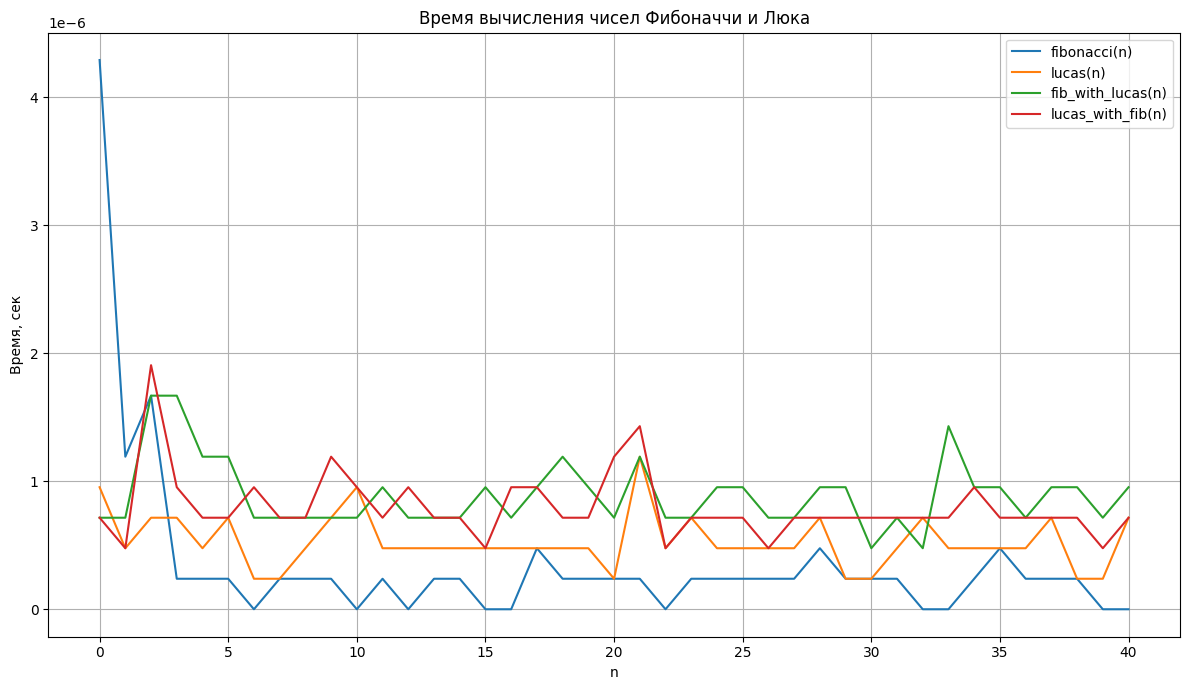

In [ ]:
import time
import matplotlib.pyplot as plt
from functools import lru_cache

@lru_cache(maxsize=None)
def fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

@lru_cache(maxsize=None)
def lucas(n):
    if n == 0:
        return 2
    elif n == 1:
        return 1
    else:
        return lucas(n-1) + lucas(n-2)

@lru_cache(maxsize=None)
def fib_with_lucas(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        i = n // 2
        j = n - i
        Fi = fib_with_lucas(i)
        Lj = lucas(j)
        Fj = fib_with_lucas(j)
        Li = lucas(i)
        return (Fi + Lj) * (Fj + Li) // 2

@lru_cache(maxsize=None)
def lucas_with_fib(n):
    if n == 0:
        return 2
    elif n == 1:
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n + 1)

N = 40
fib_times = []
lucas_times = []
fib_lucas_times = []
lucas_fib_times = []

for n in range(N + 1):
    start = time.time()
    fibonacci(n)
    fib_times.append(time.time() - start)

    start = time.time()
    lucas(n)
    lucas_times.append(time.time() - start)

    start = time.time()
    fib_with_lucas(n)
    fib_lucas_times.append(time.time() - start)

    start = time.time()
    lucas_with_fib(n)
    lucas_fib_times.append(time.time() - start)

plt.figure(figsize=(12, 7))
plt.plot(range(N+1), fib_times, label='fibonacci(n)')
plt.plot(range(N+1), lucas_times, label='lucas(n)')
plt.plot(range(N+1), fib_lucas_times, label='fib_with_lucas(n)')
plt.plot(range(N+1), lucas_fib_times, label='lucas_with_fib(n)')
plt.xlabel('n')
plt.ylabel('Время, сек')
plt.title('Время вычисления чисел Фибоначчи и Люка')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Запустите программу и разберитесь в ее коде. Попробуйте поменять параметры при вызове
функции tree и внутри нее.
Последовательно измените программу для рисования рекурсивного дерева по следующим
пунктам:
1. Измените толщину ветвей, чтобы при уменьшении branchLen линии становились
тоньше.
2. Измените цвет ветвей таким образом, чтобы самые короткие ветви окрашивались
как листья.
3. Измените угол поворота черепахи, чтобы каждая ветвь поворачивалась
произвольным образом в некотором диапазоне. Например, выбирайте угол между
15-ю и 45-ю градусами. Поэкспрериментируйте в поисках лучшего вида.
4. Измените рекурсивную часть branchLen, чтобы каждый раз вычиталось
произвольное значение из некоторого диапазона вместо некой постоянной
величины.
В отчете приведите несколько примеров получившихся деревьев

Дерево 1:


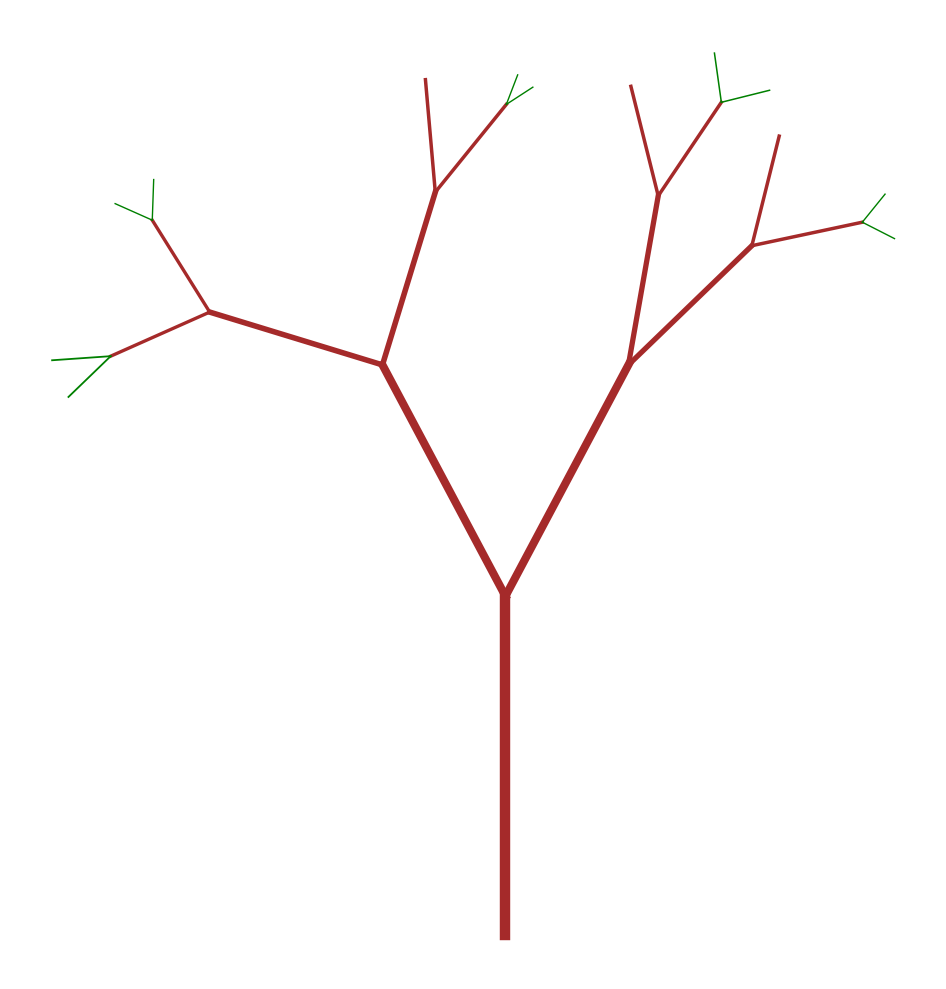

Дерево 2:


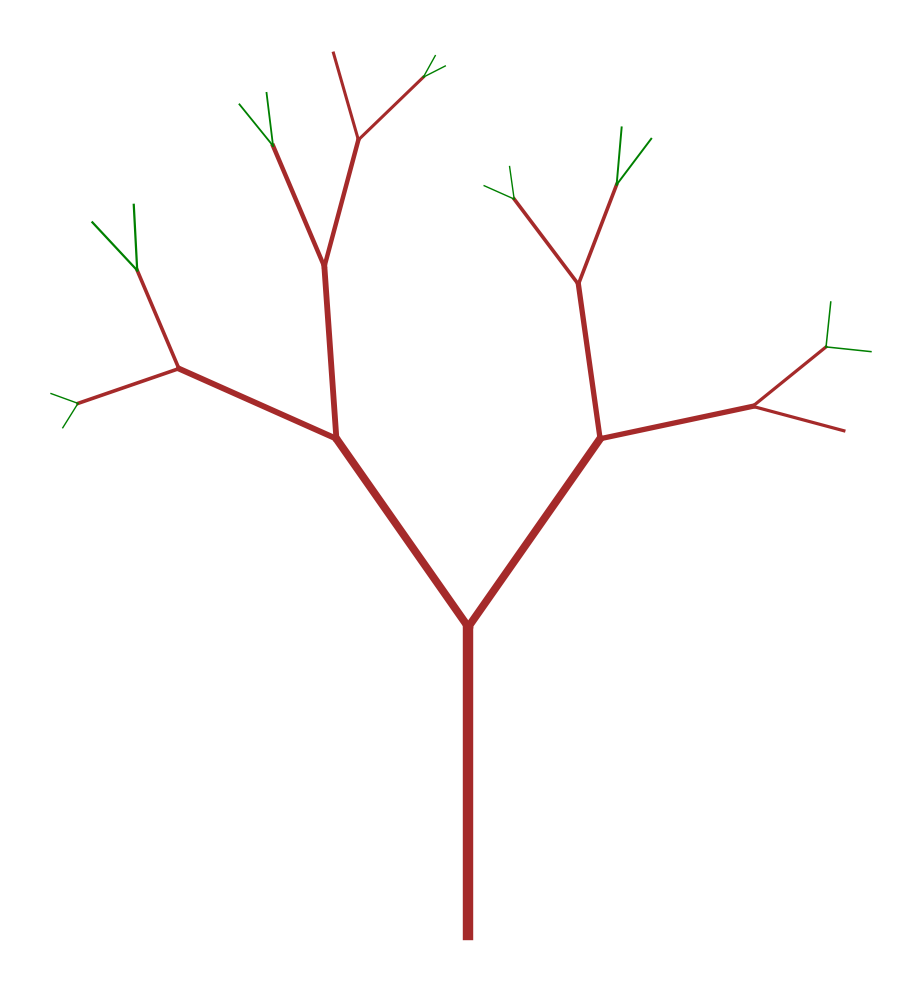

Дерево 3:


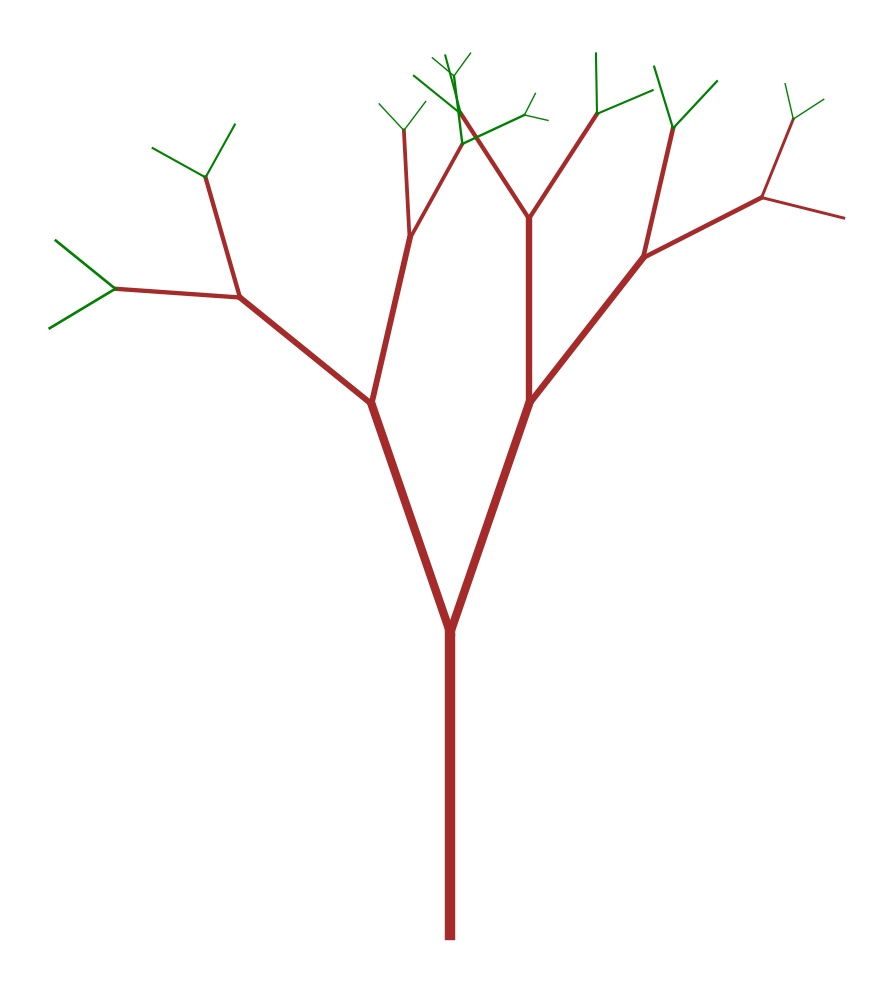

In [ ]:
import turtle
import random

def tree(branchLen, t):
    if branchLen > 5:
        # 1. Толщина зависит от длины ветки
        t.pensize(branchLen / 10)
        # 2. Цвет по длине ветки (короче - зеленее)
        if branchLen < 20:
            t.color("green")
        else:
            t.color("brown")
        
        t.forward(branchLen)
        # 3. Случайный угол поворота
        angle = random.randint(15, 45)
        # 4. Случайное уменьшение длины ветки
        length_decrement = random.randint(10, 20)
        
        t.right(angle)
        tree(branchLen - length_decrement, t)
        
        t.left(2 * angle)
        tree(branchLen - length_decrement, t)
        
        t.right(angle)
        t.backward(branchLen)

def main():
    t = turtle.Turtle()
    myWin = turtle.Screen()
    t.left(90)
    t.up()
    t.backward(100)
    t.down()
    t.speed(0)
    tree(75, t)
    myWin.exitonclick()

main()


При помощи модуля turtle нарисуйте фрактал:  
Вариант 5. Треугольник Серпинского. 
(отсутсвующий в предложенной ссылке)

In [ ]:
import turtle

def draw_triangle(points, color, my_turtle):
    """Рисует закрашенный треугольник"""
    my_turtle.fillcolor(color)
    my_turtle.up()
    my_turtle.goto(points[0][0], points[0][1])
    my_turtle.down()
    my_turtle.begin_fill()
    my_turtle.goto(points[1][0], points[1][1])
    my_turtle.goto(points[2][0], points[2][1])
    my_turtle.goto(points[0][0], points[0][1])
    my_turtle.end_fill()

def get_mid(p1, p2):
    """Находит середину между двумя точками"""
    return ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)

def sierpinski(points, degree, my_turtle):
    """Рекурсивно рисует треугольник Серпинского"""
    colormap = ['blue', 'red', 'green', 'white', 'yellow', 'violet', 'orange']
    draw_triangle(points, colormap[degree], my_turtle)
    
    if degree > 0:
        mid1 = get_mid(points[0], points[1])
        mid2 = get_mid(points[1], points[2])
        mid3 = get_mid(points[2], points[0])
        
        sierpinski([points[0], mid1, mid3], degree - 1, my_turtle)
        sierpinski([mid1, points[1], mid2], degree - 1, my_turtle)
        sierpinski([mid3, mid2, points[2]], degree - 1, my_turtle)

def main():
    my_turtle = turtle.Turtle()
    my_win = turtle.Screen()
    my_turtle.speed(0)
    
    points = [[-200, -100], [0, 200], [200, -100]]
    
    sierpinski(points, 4, my_turtle)
    
    my_win.exitonclick()

main()


Найдите или придумайте алгоритм для рисования фрактальных гор.  
Подсказка: одним из возможных методов будет использование треугольников.


Глубина рекурсии: 5


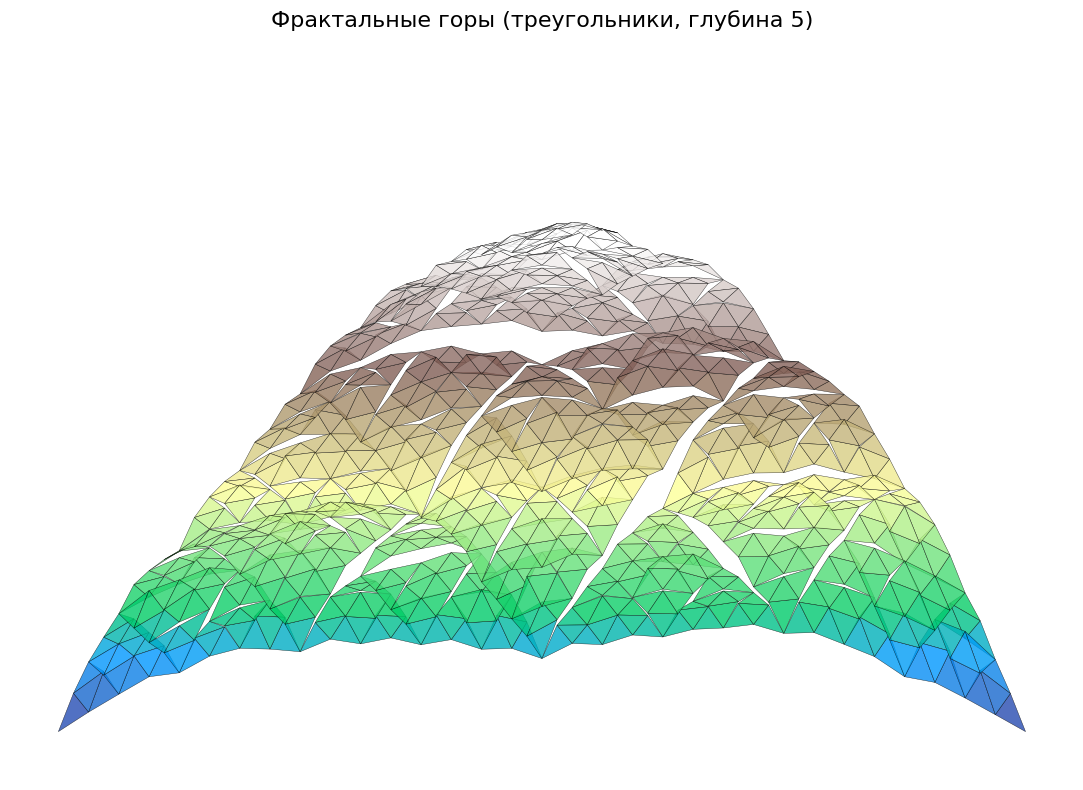

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

class TurtleDrawer:
    def __init__(self):
        self.lines = []
        self.triangles = []
    
    def add_line(self, p1, p2):
        self.lines.append([p1, p2])
    
    def add_triangle(self, p1, p2, p3):
        self.triangles.append([p1, p2, p3])

def get_mid_displaced(p1, p2, roughness, height_factor=1.0):
    """Находит середину с вертикальным смещением"""
    mid_x = (p1[0] + p2[0]) / 2
    mid_y = (p1[1] + p2[1]) / 2
    
    displacement = random.uniform(0, roughness) * height_factor
    mid_y += displacement
    
    return (mid_x, mid_y)

def mountain_triangle(p1, p2, p3, depth, max_depth, roughness, t):
    """Рекурсивно разбивает треугольник для создания горного рельефа"""
    if depth >= max_depth:
        t.add_triangle(p1, p2, p3)
        return
    
    current_roughness = roughness * (0.5 ** depth)
    
    mid1 = get_mid_displaced(p1, p2, current_roughness)
    mid2 = get_mid_displaced(p2, p3, current_roughness)
    mid3 = get_mid_displaced(p3, p1, current_roughness)
    
    mountain_triangle(p1, mid1, mid3, depth + 1, max_depth, roughness, t)
    mountain_triangle(mid1, p2, mid2, depth + 1, max_depth, roughness, t)
    mountain_triangle(mid3, mid2, p3, depth + 1, max_depth, roughness, t)
    mountain_triangle(mid1, mid2, mid3, depth + 1, max_depth, roughness, t)

def draw_mountain_triangles(max_depth=5, roughness=1.0):
    """Рисует фрактальные горы методом треугольников"""
    t = TurtleDrawer()
    
    width = 10
    height = 5
    p1 = (0, 0)
    p2 = (width, 0)
    p3 = (width/2, height)
    
    mountain_triangle(p1, p2, p3, 0, max_depth, roughness, t)
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    for tri in t.triangles:
        xs = [tri[0][0], tri[1][0], tri[2][0], tri[0][0]]
        ys = [tri[0][1], tri[1][1], tri[2][1], tri[0][1]]
        
        avg_height = (tri[0][1] + tri[1][1] + tri[2][1]) / 3
        color_intensity = avg_height / height
        color = plt.cm.terrain(color_intensity)
        
        ax.fill(xs, ys, color=color, edgecolor='black', linewidth=0.3, alpha=0.8)
    
    ax.set_xlim(-0.5, width + 0.5)
    ax.set_ylim(-0.5, height + 2)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title(f'Фрактальные горы (треугольники, глубина {max_depth})', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

print(f"Глубина рекурсии: {5}")
draw_mountain_triangles(max_depth=5, roughness=1.5)


Решите рекурсивно мини-судоку размером 4x4.  

Для этого напишите функцию solve_sudoku(matrix), где matrix - целочисленная матрица (список списков).  
В мини-судоку числа от 1 до 4 встречаются ровно один раз в каждой вертикали и
горизонтали, а также в квадратах 2x2.  
Укажите базовый и рекурсивный случаи вашего алгоритма.  

Судоку представлено в виде таблицы чисел, в которой нулями обозначены пустые места:  
0000  
0020  
0100  
3004  

Правильный ответ:  
2341  
1423  
4132  
3214  

In [ ]:
def is_safe(matrix, row, col, num):
    for x in range(4):
        if matrix[row][x] == num:
            return False
    
    for y in range(4):
        if matrix[y][col] == num:
            return False
    
    start_row = row - row % 2
    start_col = col - col % 2
    for i in range(2):
        for j in range(2):
            if matrix[start_row + i][start_col + j] == num:
                return False
    
    return True

def find_empty_location(matrix):
    for i in range(4):
        for j in range(4):
            if matrix[i][j] == 0:
                return i, j
    return None

def solve_sudoku(matrix):
    empty_loc = find_empty_location(matrix)
    if not empty_loc:
        return True
    row, col = empty_loc
    
    for num in range(1, 5):
        if is_safe(matrix, row, col, num):
            matrix[row][col] = num
            if solve_sudoku(matrix):
                return True
            matrix[row][col] = 0
    
    return False

matrix = [
    [0,0,0,0],
    [0,0,2,0],
    [0,1,0,0],
    [3,0,0,4]
]

if solve_sudoku(matrix):
    for row in matrix:
        print(row)
else:
    print("Решения нет")


[2, 3, 4, 1]
[1, 4, 2, 3]
[4, 1, 3, 2]
[3, 2, 1, 4]
